In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/week-number/weeknummers2020.xlsx


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from pathlib import Path
import os
from scipy import signal


In [3]:
def my_function(x):
    a=5 * x
    return a

a=my_function(2)
print(a)


10


In [4]:
def SP_profile(days_hours,days,Night_T_SP,Day_T_SP):
    """Temperature different between day and night."""
    delta_T= Day_T_SP - Night_T_SP

    """Define Work time """
    Wo_time =7;           """Work time start at 7 in the morning """
    duty_wo = 23-7       

    """Go to home time/ leave the working place """
    home_time = 18;           """Go home at 18 in the afternoon """
    duty_ho   = 23-18        

    """Back to home """
    #back_home = 18;         """Back home at 18.00 """
    #duty_b   = 23-18 


    #-----------------------
    t= np.linspace(0,1,(days_hours*days)+1,endpoint=False)          #+1 start from 0 days=1
    temp1 = signal.square(2 * np.pi* days * t,duty=duty_wo/24)
    temp1 = np.clip(temp1, 0, 1)
    # add delay to array
    temp1=np.roll(temp1,Wo_time)

    #----------------
    t= np.linspace(0,1,(days_hours*days)+1,endpoint=False)          #+1 start from 0 days=1
    temp2 = signal.square(2 * np.pi* days * t,duty=duty_ho/24)
    temp2 = np.clip(temp2, 0, 1)
    # add delay to array
    temp2=np.roll(temp2,home_time)

    '''
    #___________
    t= np.linspace(0,1,(days_hours*days)+1,endpoint=False)          #+1 start from 0 days=1
    temp3 = signal.square(2 * np.pi* days * t,duty=duty_b/24)
    temp3 = np.clip(temp3, 0, 1)
    # add delay to array
    temp3=np.roll(temp3,back_home)
    '''

    # Calculate SP

    temp4=temp1-temp2#+temp3
    SP=(temp4*delta_T)+Night_T_SP

    SP=SP[np.newaxis]
    SP=SP.T
    SP=np.delete(SP, -1, 0)
    return SP

In [8]:
print(Path.cwd())
#print(os.listdir("../kaggle/input"))
parent_dir = os.chdir('/kaggle/')
data_dir = Path.cwd() /'input/week-number'
print(os.listdir("../kaggle/input/week-number/"))
#output_dir = Path.cwd()/'working'/'submit'
NENdata_path = data_dir/'weeknummers2020.xlsx'
xls = pd.ExcelFile(NENdata_path)    

/kaggle
['weeknummers2020.xlsx']


In [9]:
xls.sheet_names  # Check sheet names

['Pivot', 'DATA']

In [10]:
data = pd.read_excel(xls,'DATA')

In [11]:
print(data)

         Datum        Dag  Weeknummer     Maand Kwartaal      Waarde
0   2020-01-01   woensdag           1   januari      Q 1  100.000000
1   2020-01-02  donderdag           1   januari      Q 1  120.000000
2   2020-01-03    vrijdag           1   januari      Q 1  130.000000
3   2020-01-04   zaterdag           1   januari      Q 1   90.000000
4   2020-01-05     zondag           1   januari      Q 1   80.000000
..         ...        ...         ...       ...      ...         ...
361 2020-12-27     zondag          52  december      Q 4  229.202011
362 2020-12-28    maandag          53  december      Q 4  234.047786
363 2020-12-29    dinsdag          53  december      Q 4  238.876457
364 2020-12-30   woensdag          53  december      Q 4  243.705128
365 2020-12-31  donderdag          53  december      Q 4  248.533800

[366 rows x 6 columns]


In [12]:
'''
Input Netherlands national holidays
'''

holidays = ['2020-01-01','2020-04-10','2020-04-12',
            '2020-04-13','2020-04-27','2020-05-05','2020-05-21','2020-06-01',
            '2020-12-25','2020-12-26','2020-12-31']

In [14]:
'''
Get date, time column from data frame and convert to str
'''
time = data['Datum']
time= time.astype(str)
date = data.['Dag']
date= date.astype(str)

In [126]:
print(time),print(date)

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
361    2020-12-27
362    2020-12-28
363    2020-12-29
364    2020-12-30
365    2020-12-31
Name: Datum, Length: 366, dtype: object
0       woensdag
1      donderdag
2        vrijdag
3       zaterdag
4         zondag
         ...    
361       zondag
362      maandag
363      dinsdag
364     woensdag
365    donderdag
Name: Dag, Length: 366, dtype: object


(None, None)

In [127]:
'''
Create SP profile base on weekday, weekend and holidays.
holidays and weekkend have the same profiel

'''
week_day = SP_profile(days_hours=24,days=1,Night_T_SP=15,Day_T_SP=20)
day_off  = SP_profile(days_hours=24,days=1,Night_T_SP=15,Day_T_SP=15)
temp2 = np.zeros((0,1))

for i in range(len(data)):
    #print('i',i)
    temp  = week_day
    #if data.iloc[i]['Dag'] == 'zaterdag' or data.iloc[i]['Dag'] == 'zondag':
    if date.iloc[i]=='zaterdag' or date.iloc[i] == 'zondag': 
        temp  = day_off
        print('------------------weekend------------------')
    for x in range (len(holidays)):
        print('loop:',x)
        if time.iloc[i] == holidays[x]:
            temp  = day_off
            #temp2 = np.concatenate((temp2, temp))
            print('-------------------holiday------------------')
    
    print('--week day-----',i)
    #temp  = week_day
    temp2 = np.concatenate((temp2, temp))

loop: 0
-------------------holiday------------------
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 0
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 1
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 2
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 3
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 4
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 5
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 6
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 7
loop: 0
loo

loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 84
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 85
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 86
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 87
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 88
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 89
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 90
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 91
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week 

loop: 8
loop: 9
loop: 10
--week day----- 207
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 208
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 209
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 210
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 211
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 212
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 213
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 214
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day-----

loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 331
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 332
------------------weekend------------------
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 333
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 334
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 335
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 336
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 337
loop: 0
loop: 1
loop: 2
loop: 3
loop: 4
loop: 5
loop: 6
loop: 7
loop: 8
loop: 9
loop: 10
--week day----- 338
------------------weekend------------------
loop: 0
loop

In [128]:
print(len(temp1))
print(len(temp2))

0
8784


0
100
102
103
117
125
141
152
359
360
365

8785


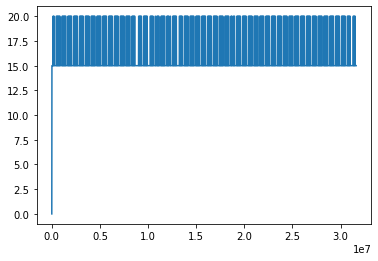

In [134]:
"""Define Temperature SP

    Assume that in normal working day, people wake up at 7.00, 
    go to work at 8.00 return home at 18.00 and go to sleep at 23.00
    
"""
days_hours   = 24                    #number_of_hour_in_oneday + start hour at 0
days         = 366                   #number of simulation days
periods      = 24*3600*days          #in seconds (day_periods*365 = years)

#create simulation time
time_t = np.linspace(0,periods,(days_hours*days)+1)
row_to_be_added = np.array([0]) 
# Adding row to numpy array 
result =temp2
#result=np.delete(temp2, np.s_[0:24], axis = 0)

#result=np.delete(result, np.s_[117*24:118*24], axis = 0)
result = np.vstack ((row_to_be_added,result))

print(len(result))
#plt.plot(time_t[0*24:7*24],result[0*24:7*24])
plt.plot(time_t,result)